<a href="https://colab.research.google.com/github/natdebandi/xenofobia_ar/blob/main/periplos_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PERIPLOS

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/2.Data-work/python-space/periplos/tweets_filtrados_combinados.csv'
df = pd.read_csv(file_path)
display(df_tweets.head())

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,quoted_status.place.place_type,quoted_status.place.name,retweeted_status.quoted_status.quoted_status_id,is_retweet,caracteres,text_pp,tokens
0,Fri Mar 05 11:01:46 +0000 2021,1367792447334580225,1367792447334580225,RT @CELS_Argentina: ✅Celebramos la decisión de...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,NaN,NaN,True,140,rt cels_argentina ✅ celebramos la decision del...,"['rt', 'celebramos', 'decision', 'ejecutivo', ..."
1,Fri Mar 05 11:06:31 +0000 2021,1367793643239702529,1367793643239702529,RT @LANACION: Ley de Migraciones: el Gobierno ...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,NaN,NaN,True,139,rt lanacion ley de migraciones el gobierno der...,"['rt', 'lanacion', 'ley', 'migración', 'gobier..."
2,Fri Mar 05 11:06:33 +0000 2021,1367793651192070144,1367793651192070144,"RT @CRLDEMONIO: Y lo peor , el alto mando d...","<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,NaN,NaN,True,139,rt crldemonio y lo peor el alto mando de carab...,"['rt', 'crldemonio', 'alto', 'mando', 'carabde..."
3,Fri Mar 05 11:06:34 +0000 2021,1367793655092813824,1367793655092813824,RT @elcarpo: El Gobierno derogó el decreto de ...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,NaN,NaN,True,140,rt elcarpo el gobierno derogo el decreto de ma...,"['rt', 'elcarpo', 'gobierno', 'derogo', 'decre..."
4,Fri Mar 05 11:06:34 +0000 2021,1367793655029764101,1367793655029764101,@joseantoniokast @sebastianpinera yo voté por ...,"<a href=""http://twitter.com/download/android"" ...",True,1.367503e+18,1.367503e+18,123955962.0,NaN,NaN,NaN,False,140,joseantoniokast sebastianpinera yo vote por se...,"['joseantoniokast', 'sebastianpinero', 'votar'..."


In [ ]:
# Mostrar información básica
print("="*50)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*50)
print(f"\nDimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\nPrimeras filas:")
print(df.head())
print(f"\nTipos de datos:")
print(df.dtypes)
print(f"\nValores faltantes:")
print(df.isnull().sum())

INFORMACIÓN GENERAL DEL DATASET

Dimensiones: 259752 filas x 16 columnas

Primeras filas:
                       created_at                   id               id_str  \
0  Fri Mar 05 11:01:46 +0000 2021  1367792447334580225  1367792447334580225   
1  Fri Mar 05 11:06:31 +0000 2021  1367793643239702529  1367793643239702529   
2  Fri Mar 05 11:06:33 +0000 2021  1367793651192070144  1367793651192070144   
3  Fri Mar 05 11:06:34 +0000 2021  1367793655092813824  1367793655092813824   
4  Fri Mar 05 11:06:34 +0000 2021  1367793655029764101  1367793655029764101   

                                                text  \
0  RT @CELS_Argentina: ✅Celebramos la decisión de...   
1  RT @LANACION: Ley de Migraciones: el Gobierno ...   
2  RT @CRLDEMONIO: Y lo peor  ,   el alto mando d...   
3  RT @elcarpo: El Gobierno derogó el decreto de ...   
4  @joseantoniokast @sebastianpinera yo voté por ...   

                                              source  truncated  \
0  <a href="http://twitter.com/

In [ ]:
# Convertir created_at a datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date
df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.day_name()

print("\n" + "="*50)
print("ANÁLISIS TEMPORAL")
print("="*50)
print(f"\nRango de fechas: {df['created_at'].min()} a {df['created_at'].max()}")

/tmp/ipython-input-592196369.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])



ANÁLISIS TEMPORAL

Rango de fechas: 2021-03-05 11:01:46+00:00 a 2021-03-09 00:02:20+00:00


In [ ]:
# 1. CANTIDAD TOTAL DE TWEETS
print("\n" + "="*50)
print("CONTEO DE TWEETS")
print("="*50)
print(f"\nTotal de tweets: {len(df)}")
print(f"Tweets originales: {(~df['is_retweet']).sum()}")
print(f"Retweets: {df['is_retweet'].sum()}")
print(f"Porcentaje de RTs: {(df['is_retweet'].sum()/len(df)*100):.2f}%")


CONTEO DE TWEETS

Total de tweets: 259752
Tweets originales: 63459
Retweets: 196293
Porcentaje de RTs: 75.57%



TWEETS POR DÍA
         date  cantidad
0  2021-03-05    106851
1  2021-03-06     80224
2  2021-03-07     37339
3  2021-03-08     35160
4  2021-03-09       178


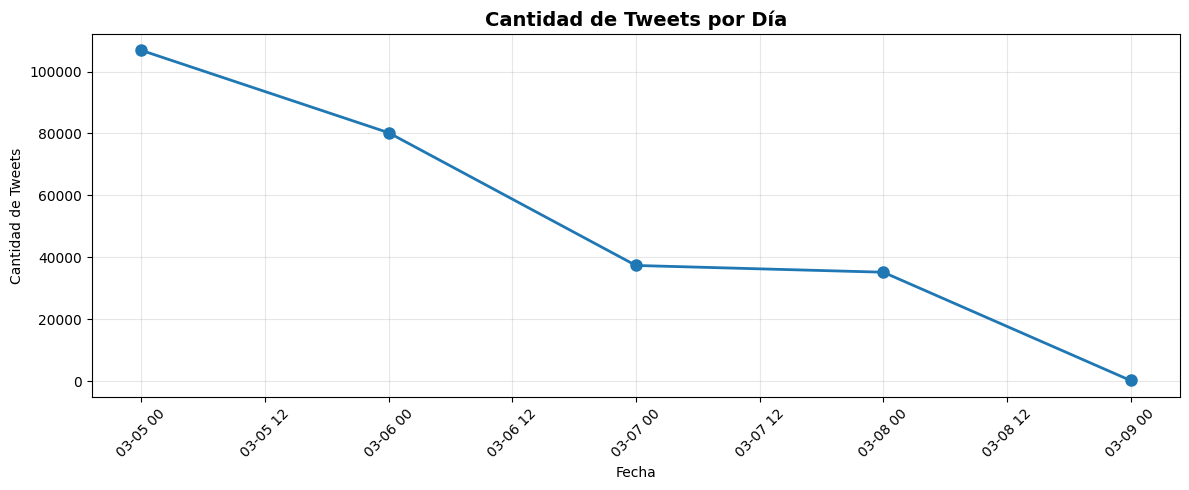

In [ ]:
# 2. TWEETS POR DÍA
print("\n" + "="*50)
print("TWEETS POR DÍA")
print("="*50)
tweets_por_dia = df.groupby('date').size().reset_index(name='cantidad')
print(tweets_por_dia)

# Visualización
plt.figure(figsize=(12, 5))
plt.plot(tweets_por_dia['date'], tweets_por_dia['cantidad'], marker='o', linewidth=2, markersize=8)
plt.title('Cantidad de Tweets por Día', fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Tweets')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


TOP 20 USUARIOS MÁS RETUITEADOS
usuario_rt
PatoBullrich       6442
maquialifraco      6363
MiguelPichetto     4982
JorgeFaurie        3031
jorgemacri         2887
todonoticias       2802
florenciarietto    2408
luispetri          2079
WolffWaldo         1974
rctagliaferro      1970
AndyWSOK           1968
edufeiok           1915
desclasado_        1861
juancampanella     1576
peponila           1561
gene_llerena       1549
baradit            1467
diegosantilli      1427
PinzonBueno        1325
madorni            1300
Name: count, dtype: int64


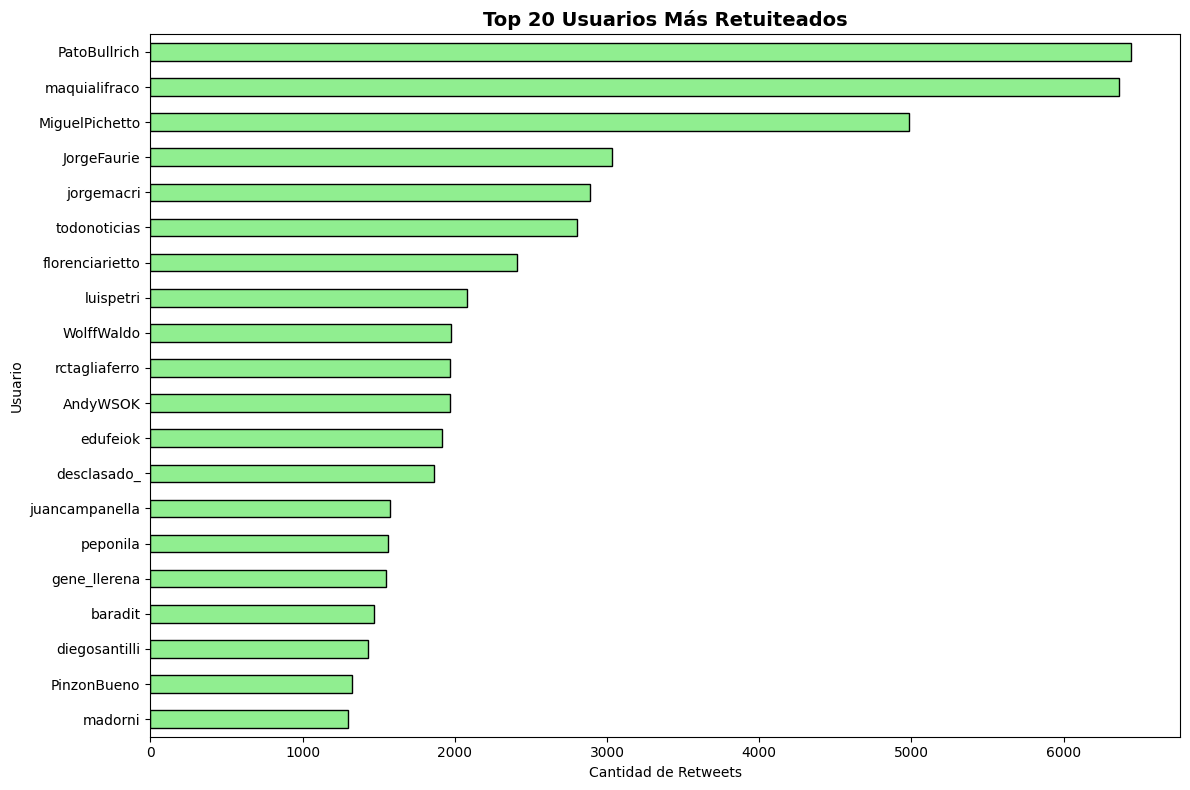

In [ ]:
# 5. USUARIOS QUE MÁS TWEETEAN
# Extraer username del campo source o text (para RTs)
def extraer_usuario(row):
    if row['is_retweet']:
        match = re.search(r'RT @(\w+):', row['text'])
        if match:
            return match.group(1)
    return 'original_tweet'

df['usuario_rt'] = df.apply(extraer_usuario, axis=1)

print("\n" + "="*50)
print("TOP 20 USUARIOS MÁS RETUITEADOS")
print("="*50)
top_usuarios = df[df['is_retweet']]['usuario_rt'].value_counts().head(20)
print(top_usuarios)

plt.figure(figsize=(12, 8))
top_usuarios.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Top 20 Usuarios Más Retuiteados', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Retweets')
plt.ylabel('Usuario')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


PALABRAS MÁS FRECUENTES (de text_pp)

Top 30 palabras más frecuentes:
rt: 196261
delincuente: 104925
extranjero: 53385
gobierno: 35721
decreto: 25181
antecedente: 25041
pais: 24319
ingreso: 19242
argentina: 15339
macri: 14691
entrar: 14591
narco: 14524
q: 13569
preso: 11874
liberar: 11297
pai: 11016
d: 10248
año: 10203
importar: 10104
permitir: 10086
joven: 9945
derogar: 9728
dejar: 9533
argentino: 9526
exportar: 8499
impediar: 8311
derogo: 8263
penal: 8219
profesionalo: 7778
expulsion: 7644


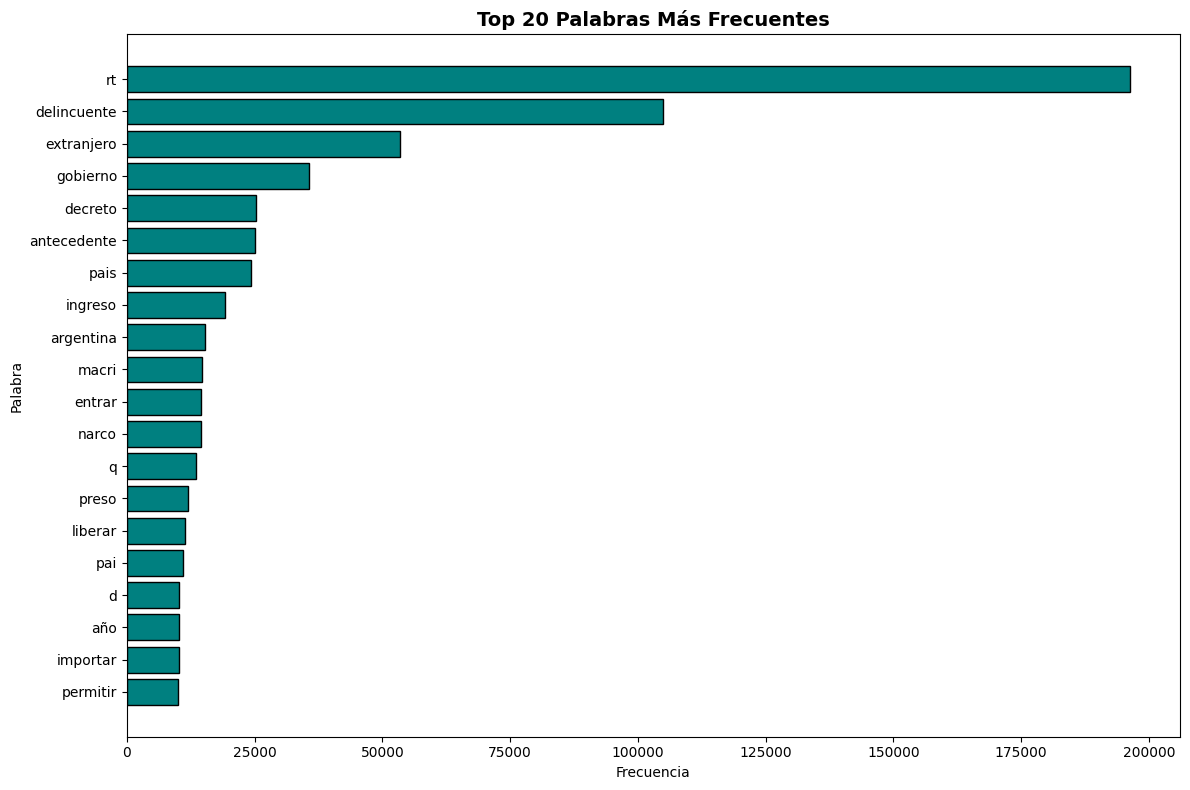

In [ ]:
# 8. ANÁLISIS DE PALABRAS MÁS FRECUENTES
print("\n" + "="*50)
print("PALABRAS MÁS FRECUENTES (de text_pp)")
print("="*50)

# Concatenar todo el texto preprocesado
import ast
todas_palabras = []
for tokens in df['tokens'].dropna():
    try:
        token_list = ast.literal_eval(tokens)
        todas_palabras.extend(token_list)
    except:
        pass

# Contar frecuencias
palabra_freq = Counter(todas_palabras)
top_palabras = palabra_freq.most_common(30)
print("\nTop 30 palabras más frecuentes:")
for palabra, freq in top_palabras:
    print(f"{palabra}: {freq}")

# Visualizar top 20
palabras, frecuencias = zip(*top_palabras[:20])
plt.figure(figsize=(12, 8))
plt.barh(palabras, frecuencias, color='teal', edgecolor='black')
plt.title('Top 20 Palabras Más Frecuentes', fontsize=14, fontweight='bold')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# 11. TOP 5 TWEETS ORIGINALES MÁS RETUITEADOS
print("\n" + "="*50)
print("TOP 5 TWEETS ORIGINALES MÁS RETUITEADOS")
print("="*50)

# Contar cuántas veces se retuitea cada usuario
retweets_count = df[df['is_retweet']]['usuario_rt'].value_counts()

# Buscar los tweets originales de esos usuarios en el dataset
top_5_usuarios = retweets_count.head(5).index.tolist()

print("\nUsuarios más retuiteados y cantidad de RTs:\n")
for i, usuario in enumerate(top_5_usuarios, 1):
    cant_rts = retweets_count[usuario]
    print(f"{i}. @{usuario}: {cant_rts} retweets")

    # Buscar el tweet original de este usuario en el dataset
    tweet_original = df[df['text'].str.contains(f'RT @{usuario}:', na=False)]['text'].iloc[0] if len(df[df['text'].str.contains(f'RT @{usuario}:', na=False)]) > 0 else None

    if tweet_original:
        # Extraer el texto sin el RT @usuario:
        texto_limpio = re.sub(r'RT @\w+:\s*', '', tweet_original)
        print(f"   Texto: {texto_limpio}")
    print()


TOP 5 TWEETS ORIGINALES MÁS RETUITEADOS

Usuarios más retuiteados y cantidad de RTs:

1. @PatoBullrich: 6442 retweets
   Texto: El presidente le manda un mensaje a los delincuentes y a los narcos. Al gobierno no le alcanzó con liberar presos propios…

2. @maquialifraco: 6363 retweets
   Texto: Disculpen formoseños, el Presidente @alferdez está ocupado velando por los Derechos Humanos de delincuentes extranjeros.…

3. @MiguelPichetto: 4982 retweets
   Texto: No hay que permitir el ingreso de extranjeros con antecedentes penales a la Argentina. Esto es facilitar el narcotráfic…

4. @JorgeFaurie: 3031 retweets
   Texto: Grave error anular Decreto que autorizaba  expulsión extranjeros condenados. Los argentinos necesitamos poder protegernos…

5. @jorgemacri: 2887 retweets
   Texto: Hace un año liberaron a los presos y ahora dejan entrar delincuentes y narcos. Una vez más el gobierno le da la espalda a l…



In [ ]:
# VERSIÓN ALTERNATIVA: Mostrar con más detalles
print("\n" + "="*50)
print("DETALLE DE LOS 5 TWEETS MÁS RETUITEADOS")
print("="*50)

for i, (usuario, cantidad) in enumerate(retweets_count.head(5).items(), 1):
    print(f"\n{'='*60}")
    print(f"#{i} - @{usuario}")
    print(f"{'='*60}")
    print(f"Veces retuiteado en el dataset: {cantidad}")

    # Buscar un ejemplo del RT
    ejemplo_rt = df[df['text'].str.contains(f'RT @{usuario}:', na=False)].iloc[0]

    # Extraer texto limpio
    texto_completo = ejemplo_rt['text']
    texto_sin_rt = re.sub(r'RT @\w+:\s*', '', texto_completo)

    print(f"\nTexto del tweet:")
    print(f'"{texto_sin_rt}"')

    # Información adicional
    fecha = ejemplo_rt['created_at']
    print(f"\nPrimera aparición en dataset: {fecha}")
    print(f"Caracteres: {ejemplo_rt['caracteres']}")
    print(f"Truncado: {'Sí' if ejemplo_rt['truncated'] else 'No'}")


DETALLE DE LOS 5 TWEETS MÁS RETUITEADOS

#1 - @PatoBullrich
Veces retuiteado en el dataset: 6442

Texto del tweet:
"El presidente le manda un mensaje a los delincuentes y a los narcos. Al gobierno no le alcanzó con liberar presos propios…"

Primera aparición en dataset: 2021-03-05 13:06:47+00:00
Caracteres: 140
Truncado: No

#2 - @maquialifraco
Veces retuiteado en el dataset: 6363

Texto del tweet:
"Disculpen formoseños, el Presidente @alferdez está ocupado velando por los Derechos Humanos de delincuentes extranjeros.…"

Primera aparición en dataset: 2021-03-05 14:45:19+00:00
Caracteres: 140
Truncado: No

#3 - @MiguelPichetto
Veces retuiteado en el dataset: 4982

Texto del tweet:
"No hay que permitir el ingreso de extranjeros con antecedentes penales a la Argentina. Esto es facilitar el narcotráfic…"

Primera aparición en dataset: 2021-03-05 15:27:31+00:00
Caracteres: 140
Truncado: No

#4 - @JorgeFaurie
Veces retuiteado en el dataset: 3031

Texto del tweet:
"Grave error anular Decreto